EDA Project Pokèmon

Introduction:

Welcome ! to my Exploratory Data Analysis project on Pokemon.

Pokémon for me growing up was a huge part of my childhood and in many ways I always sought to be better at the game. One of the many ways I strived to be a better Pokémon trainer included learning and exploring the games internal data values. These values were originally hidden from the player but could be hinted at which category they fell into by a particular in game character. Furthermore numerically out of the six statical categories a Pokemon possessed they are allowed 0 - 31 of these values per stat they are known as IV's ( Individual Values ) IV's are similar to innate potential and represent the potential for that respective attribute. Moreover there was another semi-hidden value these are know as EV’s ( Effort Values ) and unlike the later these values are not distributed via birth but allotted from training. Developing that particular attribute of the Pokemon increases these values, they range from 0 - 252 per stat with a total investment per Pokémon of 510. I seek with this project to provide insights on the Pokemon with high value attributes and show why you should invest into them when considering building a team. I ultimate would like to perform machine learning on the EV distribution onto those attributes to show which of them are worth investing into.

Frame The Problem:

- What Pokemon type has the highest average base stat across each generation, based off primary types ?
e.g ( Fire Types are dominate in Gen 1 )

- What category does that Pokemon fall into ? 
e.g ( Normal , Mythical, Legendary )

- What is the dominating stat for that generation ?
e.g ( Gen 5 has the highest base special attack across all gens )

- What Key features determine a legendary Pokémon ? 
- Can you predict that Pokemon consistently with the features provided ?

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
%matplotlib inline

In [4]:
pokedex = pd.read_csv('/Users/jtc/Desktop/hello_ds/pokedex_(Update_05.20).csv')

In [5]:
pokedex.head()
pokedex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 51 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1028 non-null   int64  
 1   pokedex_number    1028 non-null   int64  
 2   name              1028 non-null   object 
 3   german_name       938 non-null    object 
 4   japanese_name     938 non-null    object 
 5   generation        1028 non-null   int64  
 6   status            1028 non-null   object 
 7   species           1028 non-null   object 
 8   type_number       1028 non-null   int64  
 9   type_1            1028 non-null   object 
 10  type_2            542 non-null    object 
 11  height_m          1028 non-null   float64
 12  weight_kg         1027 non-null   float64
 13  abilities_number  1028 non-null   int64  
 14  ability_1         1025 non-null   object 
 15  ability_2         513 non-null    object 
 16  ability_hidden    810 non-null    object 


In [6]:
remove_cols = ['german_name','japanese_name','species','type_number','abilities_number','ability_1',
               'ability_2','ability_hidden','percentage_male','egg_cycles','against_normal','against_fire',
               'against_water','against_electric','against_grass','against_ice','against_fight',
              'against_poison','against_ground','against_flying','against_psychic','against_bug',
              'against_rock','against_ghost','against_dragon','against_dark','against_steel','against_fairy']
pokedex = pokedex.drop(remove_cols, axis = 1)

generation
5    580.0
6    390.0
8    395.0
Name: total_points, dtype: float64
generation
1    473.565217
2    421.789474
3    482.857143
4    438.062500
5    453.789474
6    458.333333
7    438.250000
Name: total_points, dtype: float64


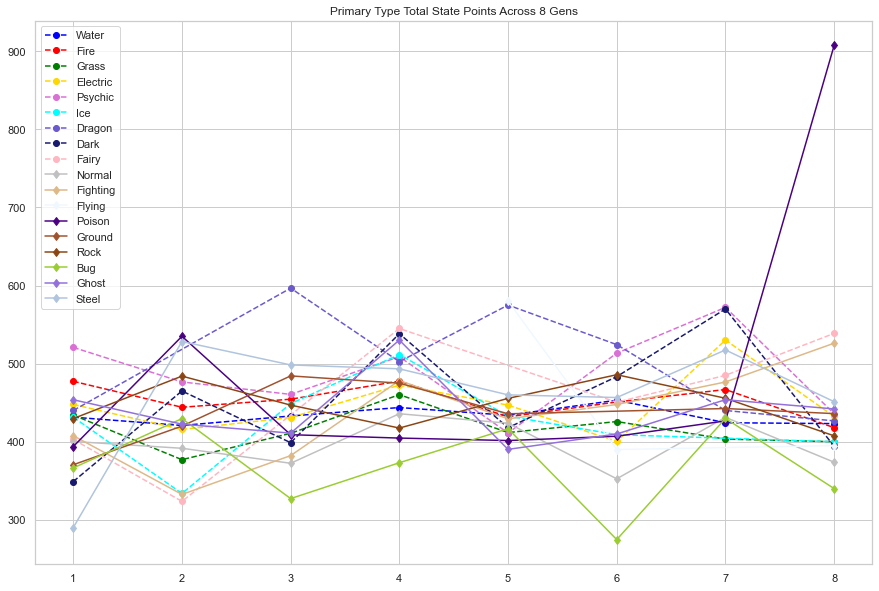

In [7]:
# Group By Method to join type 1 (primary type) and generation juxtapose to total points
# to compare across gen.
type1_avg = pokedex.groupby(['type_1','generation'])['total_points'].mean()
type2_avg = pokedex.groupby(['type_2','generation'])['total_points'].mean()

'''
print(type1_avg.Water.head(8))
print(type1_avg.Grass.head(8))
print(type1_avg.Electric.head(8))
print(type1_avg.Psychic.head(8))
print(type1_avg.Ice.head(8))
print(type1_avg.Dragon.head(8))
print(type1_avg.Dark.head(8))
print(type1_avg.Fairy.head(8))
print(type1_avg.Normal.head(8))
print(type1_avg.Fighting.head(8))

print(type1_avg.Poison.head(8))
print(type1_avg.Ground.head(8))
print(type1_avg.Rock.head(8))
print(type1_avg.Bug.head(8))
print(type1_avg.Ghost.head(8))
print(type1_avg.Steel.head(8))
'''
# Flying Type Interesting Findings as of Gen 5 there was no primary Flying type pokemon 
print(type1_avg.Flying.head(8))
print(type2_avg.Flying.head(8))
fig = plt.figure(figsize=(15,10))

plt.title('Primary Type Total State Points Across 8 Gens')

plt.plot(type1_avg.Water, color='blue', linestyle='dashed', marker='o', label='Water')

plt.plot(type1_avg.Fire, color='red', linestyle='dashed', marker='o', label='Fire')

plt.plot(type1_avg.Grass, color='green', linestyle='dashed', marker='o', label='Grass')

plt.plot(type1_avg.Electric, color='gold', linestyle='dashed', marker='o', label='Electric')

plt.plot(type1_avg.Psychic, color='orchid', linestyle='dashed', marker='o', label='Psychic')

plt.plot(type1_avg.Ice, color='cyan', linestyle='dashed', marker='o', label='Ice')

plt.plot(type1_avg.Dragon, color='slateblue', linestyle='dashed', marker='o', label='Dragon')

plt.plot(type1_avg.Dark, color='midnightblue', linestyle='dashed', marker='o', label='Dark')

plt.plot(type1_avg.Fairy, color='lightpink', linestyle='dashed', marker='o', label='Fairy' )

plt.plot(type1_avg.Normal, color='silver', linestyle='solid', marker='d', label='Normal')

plt.plot(type1_avg.Fighting, color='burlywood', linestyle='solid', marker='d', label='Fighting')

plt.plot(type1_avg.Flying, color='aliceblue', linestyle='solid', marker='d', label='Flying')

plt.plot(type1_avg.Poison, color='indigo', linestyle='solid', marker='d', label='Poison')

plt.plot(type1_avg.Ground, color='sienna', linestyle='solid', marker='d', label='Ground')

plt.plot(type1_avg.Rock, color='saddlebrown', linestyle='solid', marker='d', label='Rock')

plt.plot(type1_avg.Bug,  color='yellowgreen', linestyle='solid', marker='d', label='Bug')

plt.plot(type1_avg.Ghost,  color='mediumpurple', linestyle='solid', marker='d', label='Ghost')

plt.plot(type1_avg.Steel,  color='lightsteelblue', linestyle='solid', marker='d', label='Steel')

plt.legend(loc="upper left")







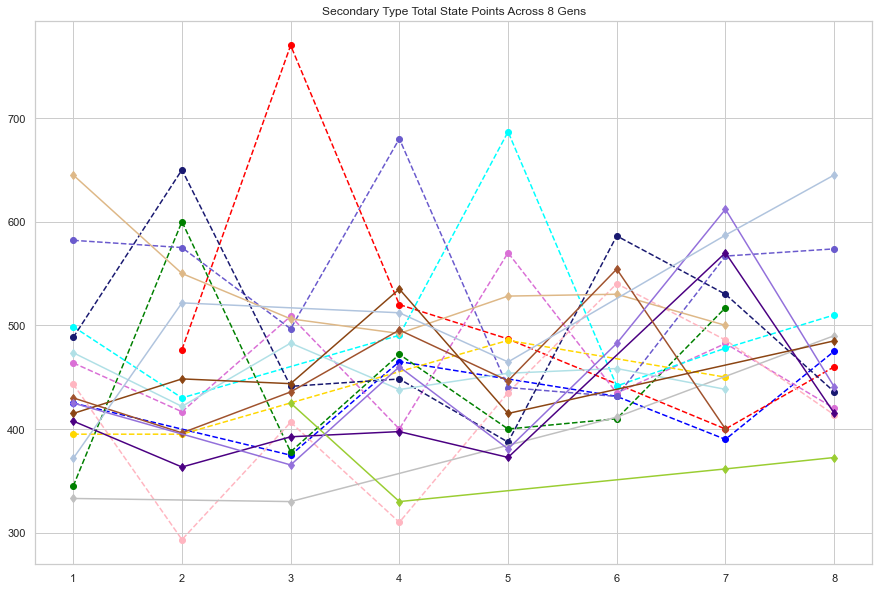

In [8]:
fig = plt.figure(figsize=(15,10))

plt.title('Secondary Type Total State Points Across 8 Gens')

plt.plot(type2_avg.Water, color='blue', linestyle='dashed', marker='o', label='Water')

plt.plot(type2_avg.Fire, color='red', linestyle='dashed', marker='o', label='Fire')

plt.plot(type2_avg.Grass, color='green', linestyle='dashed', marker='o', label='Grass')

plt.plot(type2_avg.Electric, color='gold', linestyle='dashed', marker='o', label='Electric')

plt.plot(type2_avg.Psychic, color='orchid', linestyle='dashed', marker='o', label='Psychic')

plt.plot(type2_avg.Ice, color='cyan', linestyle='dashed', marker='o', label='Ice')

plt.plot(type2_avg.Dragon, color='slateblue', linestyle='dashed', marker='o', label='Dragon')

plt.plot(type2_avg.Dark, color='midnightblue', linestyle='dashed', marker='o', label='Dark')

plt.plot(type2_avg.Fairy, color='lightpink', linestyle='dashed', marker='o', label='Fairy' )

plt.plot(type2_avg.Normal, color='silver', linestyle='solid', marker='d', label='Normal')

plt.plot(type2_avg.Fighting, color='burlywood', linestyle='solid', marker='d', label='Fighting')

plt.plot(type2_avg.Flying, color='powderblue', linestyle='solid', marker='d', label='Flying')

plt.plot(type2_avg.Poison, color='indigo', linestyle='solid', marker='d', label='Poison')

plt.plot(type2_avg.Ground, color='sienna', linestyle='solid', marker='d', label='Ground')

plt.plot(type2_avg.Rock, color='saddlebrown', linestyle='solid', marker='d', label='Rock')

plt.plot(type2_avg.Bug,  color='yellowgreen', linestyle='solid', marker='d', label='Bug')

plt.plot(type2_avg.Ghost,  color='mediumpurple', linestyle='solid', marker='d', label='Ghost')

plt.plot(type2_avg.Steel,  color='lightsteelblue', linestyle='solid', marker='d', label='Steel')

#plt.legend(loc="upper left")


Text(0.5, 1.0, 'Ghost')

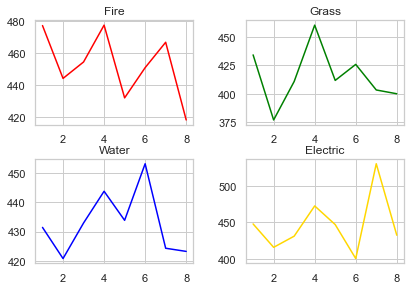

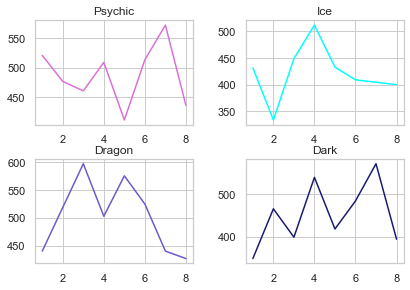

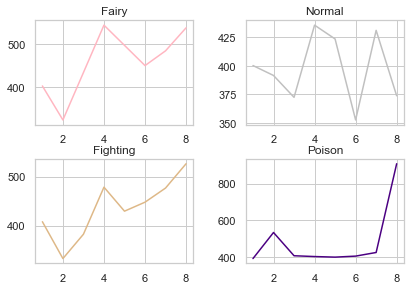

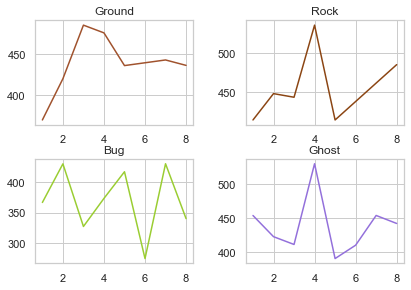

In [9]:

fig, axs = plt.subplots(2,2)
fig.tight_layout()
axs[0,0].plot(type1_avg.Fire, color='red')
axs[0,0].set_title('Fire')
axs[0,1].plot(type1_avg.Grass, color='green')
axs[0,1].set_title('Grass')
axs[1,0].plot(type1_avg.Water, color='blue')
axs[1,0].set_title('Water')
axs[1,1].plot(type1_avg.Electric, color='gold')
axs[1,1].set_title('Electric')

fig, axs = plt.subplots(2,2)
fig.tight_layout()
axs[0,0].plot(type1_avg.Psychic, color='orchid')
axs[0,0].set_title('Psychic')
axs[0,1].plot(type1_avg.Ice, color='cyan')
axs[0,1].set_title('Ice')
axs[1,0].plot(type1_avg.Dragon, color='slateblue')
axs[1,0].set_title('Dragon')
axs[1,1].plot(type1_avg.Dark, color='midnightblue')
axs[1,1].set_title('Dark')

fig, axs = plt.subplots(2,2)
fig.tight_layout()
axs[0,0].plot(type1_avg.Fairy, color='lightpink')
axs[0,0].set_title('Fairy')
axs[0,1].plot(type1_avg.Normal, color='silver')
axs[0,1].set_title('Normal')
axs[1,0].plot(type1_avg.Fighting, color='burlywood')
axs[1,0].set_title('Fighting')
axs[1,1].plot(type1_avg.Poison, color='indigo')
axs[1,1].set_title('Poison')


fig, axs = plt.subplots(2,2)
fig.tight_layout()
axs[0,0].plot(type1_avg.Ground, color='sienna')
axs[0,0].set_title('Ground')
axs[0,1].plot(type2_avg.Rock, color='saddlebrown')
axs[0,1].set_title('Rock')
axs[1,0].plot(type1_avg.Bug, color='yellowgreen')
axs[1,0].set_title('Bug')
axs[1,1].plot(type1_avg.Ghost, color='mediumpurple')
axs[1,1].set_title('Ghost')





Flying Types is the only type introduced in GEN 1 that was not a primary type for pokemon 
until Gen 5 in which we can see that Flying types had thier peak in overall stats.

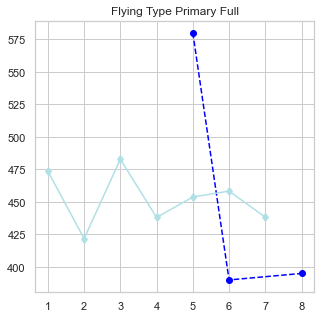

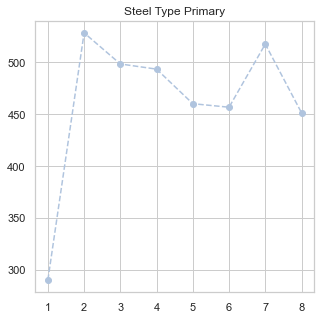

In [10]:
fig = plt.figure(figsize=(5,5))

plt.title('Flying Type Primary Full')

plt.plot(type1_avg.Flying, color='blue', linestyle='dashed', marker='o', label='Flying')
plt.plot(type2_avg.Flying, color='powderblue', linestyle='solid', marker='d', label='Flying')



fig = plt.figure(figsize=(5,5))

plt.title('Steel Type Primary')

plt.plot(type1_avg.Steel, color='lightsteelblue', linestyle='dashed', marker='o', label='Steel')


[Text(0, 0, 'Grass'),
 Text(1, 0, 'Fire'),
 Text(2, 0, 'Water'),
 Text(3, 0, 'Bug'),
 Text(4, 0, 'Normal'),
 Text(5, 0, 'Dark'),
 Text(6, 0, 'Poison'),
 Text(7, 0, 'Electric'),
 Text(8, 0, 'Ground'),
 Text(9, 0, 'Ice'),
 Text(10, 0, 'Fairy'),
 Text(11, 0, 'Steel'),
 Text(12, 0, 'Fighting'),
 Text(13, 0, 'Psychic'),
 Text(14, 0, 'Rock'),
 Text(15, 0, 'Ghost'),
 Text(16, 0, 'Dragon'),
 Text(17, 0, 'Flying')]

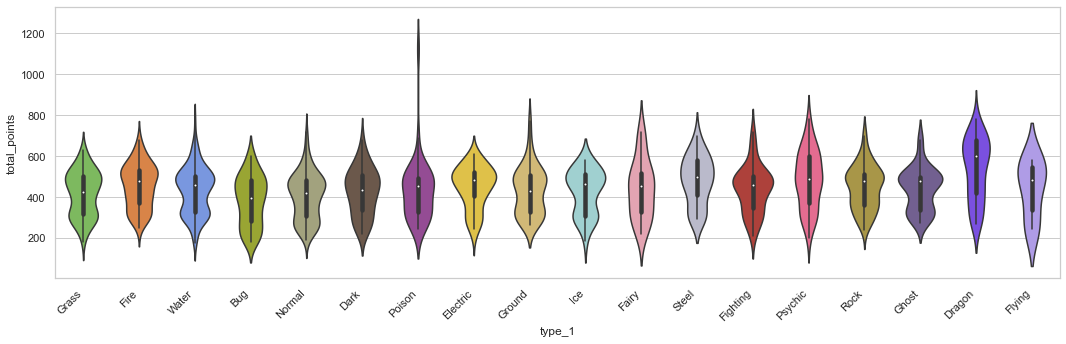

In [11]:
# Color Orient the types
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#705746',  # Dark
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#98D8D8',  # Ice
                    '#EE99AC',  # Fairy
                    '#B7B7CE',  # Steel
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#7038F8',  # Dragon
                    '#A98FF3',  # Flying
                    
                   ]

plt.figure(figsize=(18,5))
chart = sns.violinplot(x='type_1',
                       y='total_points',
                       data=pokedex,
                       palette=pkmn_type_colors)
chart.set_xticklabels(chart.get_xticklabels(),rotation=45, horizontalalignment ='right')